## Image denoising Using Autoencoder
An autoencoder can also be trained to remove noise from images. Create a noisy version of the Fashion MNIST dataset by applying random noise to each image. Train an autoencoder using the noisy image as input, and the original image as the target.

### Import Required libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dense, Input, MaxPooling2D, Conv2D, Conv2DTranspose
from keras.datasets import fashion_mnist
from keras.models import Model

### Load the Fasion Mnist Dataset

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Plot the Original Image

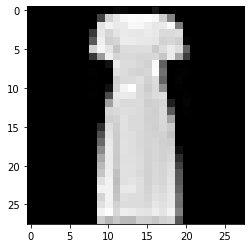

In [4]:
plt.imshow(x_train[50])
plt.gray()

### Adding random Noise to Images

In [3]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

### Plot the Noisy image

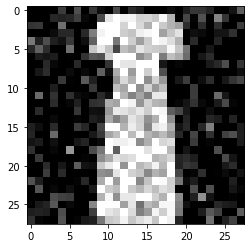

In [5]:
plt.imshow(x_train_noisy[50])
plt.gray()

### Create Auto-Encoder model
- Create a convolutional autoencoder using  `Conv2D` layers in the `encoder`, and `Conv2DTranspose` layers in the `decoder`.

In [9]:
input = Input(shape=(28, 28, 1))

# Encoder
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)
encoded = Conv2D(32, (3, 3), activation="relu", padding="same")(encoded)
encoded = MaxPooling2D((2, 2), padding="same")(encoded)

# Decoder
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(encoded)
decoded = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(decoded)
decoded = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(decoded)

# Autoencoder
autoencoder = Model(input, decoded)

#Compile layer
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

#Model summary
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 32)       9248

### Fit and train the model

In [13]:
autoencoder.fit(
    x=x_train_noisy,
    y=x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 176s 376ms/step - loss: 0.2646 - val_loss: 0.2643
Epoch 2/10
469/469 [==============================] - 174s 372ms/step - loss: 0.2643 - val_loss: 0.2635
Epoch 3/10
469/469 [==============================] - 180s 384ms/step - loss: 0.2640 - val_loss: 0.2636
Epoch 4/10
469/469 [==============================] - 175s 373ms/step - loss: 0.2638 - val_loss: 0.2643
Epoch 5/10
469/469 [==============================] - 175s 373ms/step - loss: 0.2635 - val_loss: 0.2619
Epoch 6/10
469/469 [==============================] - 176s 376ms/step - loss: 0.2634 - val_loss: 0.2624
Epoch 7/10
469/469 [==============================] - 175s 374ms/step - loss: 0.2632 - val_loss: 0.2622
Epoch 8/10
469/469 [==============================] - 175s 373ms/step - loss: 0.2631 - val_loss: 0.2622
Epoch 9/10
469/469 [==============================] - 174s 372ms/step - loss: 0.2629 - val_loss: 0.2624
Epoch 10/10
469/469 [==============================] - 177s 377m

### Plot the Noisy and Decoded Image

In [14]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 8s 25ms/step


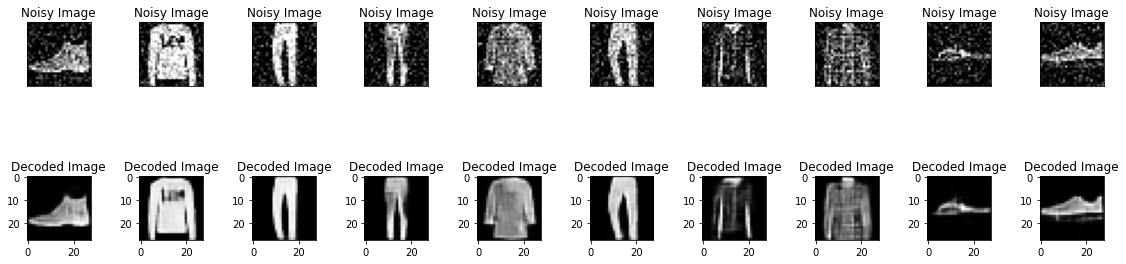

In [17]:
plt.figure(figsize=(40, 4))
for i in range(10):
    ax=plt.subplot(3,20, i+1)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Noisy Image")
    
    plt.subplot(3,20, i+1+2*20)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title("Decoded Image") 
plt.show()